In [144]:
# Global imports
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.linear_model

# Introduction to Data Science - Project - Sensor Data Preparation

### File Input/Output Functions

You may find the following function useful to read the data files into lists.  Feel free to write your own routine instead if you choose. This function accepts a full path to a file and returns the file as a list of integers or floats. **Make sure you use the appropriate parameters for each data file.**

In [145]:
def read_list_from_file(filespec, conversion=float):
    """Return a list with each line of the input file as an element."""
    with open(filespec) as f:
        # "read" does not provide conversion to types; it returns strings, so we need to convert the data
        lines = list(map(conversion, f.read().splitlines()))
    return(lines)

## Problem Statement

Vibranium is a very valuable element (at least in the Marvel universe).  A leading Vibranium producing country has recently discovered that it can effectively "mine" Vibrainium atoms from air.  One of the most skilled mining engineers has built prototype sensors for detecting Vibranium concentrations.

The engineer has asked you to produce a predictor of Vibranium concentration (number of Vibranium atoms per billion air atoms) based upon air temperature in Celsius using preliminary data she has collected.

Unfortunately, the sensors are prototypes.  As a result, the sensors are sometimes faulty.  You will have to adapt to the faulty data.  The sensor engineer, who clearly has significant domain expertise, will provide some guidance on dealing with sensor challenges.

## Acquiring Data

The engineer has two files containing the sensor data.  One file, "sensor.txt" contains the sensor readings with a single reading per line in the file.

The other file "temperature.txt" contains the Cesius temperature associated with the sensor reading.  
Each line of the temperature file aligns with the corresponding line in the sensor file.

### <span style="color:red">Task 1</span>

* Read the sensor data into a list.  
* Read the temperature values into another list. 

Insert cells into this notebook here to show your work (do this for all the tasks in this notebook).  

If needed, use your friend, The Internet, to look for ways to read data into a list in Python.

In [146]:
def readfile(filepath: str, conversion: type) -> list:
    """Modification of read_list_from_file to use multiple types and docstrings.

    Args:
        filepath (str): Name of the file to read.
        conversion (type): Type to convert each string line of the file to.

    Returns:
        list: List of lines from the file, converted to the specified type.
    """
    with open(filepath) as f:
        lines = list(map(conversion, f.read().splitlines()))
    return lines

In [147]:
# Read the sensor data into a list.  
sensor_vals: list = readfile("sensor.txt", float)
# Read the temperature values into another list.
temp_vals: list = readfile("temperature.txt", int)

### <span style="color:red">Task 2</span>

* Write a Python function to compute and print the following descriptive statistics for an input list.
    - count
    - min 
    - max
    - mean
    - sum
    - mode
    - median
    - population standard deviation
* Call your descriptive statistics function to report individually on the sensor data and the temperature data.

In [148]:
# Write a Python function to compute and print the following descriptive statistics for an input list.
def stats(data: list) -> None:
    """Calculates and prints stats for the list of inputs

    Args:
        data (list): A collection of numeric values.
    """
    print(f"Count: {len(data)}")
    print(f"Min: {min(data)}")
    print(f"Max: {max(data)}")
    print(f"Mean: {statistics.mean(data)}")
    print(f"Sum: {sum(data)}")
    print(f"Mode: {statistics.mode(data)}")
    print(f"Median: {statistics.median(data)}")
    print(f"S.D.: {statistics.stdev(data)}")

# Call your descriptive statistics function to report individually on the sensor data and the temperature data.
stats(sensor_vals)
stats(temp_vals)

Count: 200
Min: -2103.8
Max: 2420.0
Mean: 1175.615
Sum: 235123.0000000001
Mode: 0.0
Median: 1380.6
S.D.: 900.6154085655701
Count: 200
Min: -20
Max: 30
Mean: 5
Sum: 1000
Mode: 20
Median: 4.0
S.D.: 14.90404821739153


### <span style="color:red">Task 3</span>

* Write a Python function to compute and print the frequency of each value in an input list. The function should accept a list of valued and return a dictionary of values mapped to frequencies.  This function should be reusable for different list of values.
* Call your frequency function to report individually on the sensor data and the temperature data.

Hint: See Counter example from the collections module from Chapter 6 in the book or the NumPy example from Chapter 5.

In [149]:
# Write a Python function to compute and print the frequency of each value in an input list. The function should accept a list of valued and return a dictionary of values mapped to frequencies.  This function should be reusable for different list of values.
def count_frequencies(data: list) -> dict:
    """Counts the number of times each value occurs in the list, returning a dictionary of value: frequency key/value pairs

    Args:
        data (list): A collection of numeric values.

    Returns:
        dict: A dictionary of value: frequency key/value pairs.
    """
    value_frequencies = {}
    for value in data:
        if value in value_frequencies:
            value_frequencies[value] += 1
        else:
            value_frequencies[value] = 1
    return value_frequencies

# Call your frequency function to report individually on the sensor data and the temperature data.
sensor_frequencies = count_frequencies(sensor_vals)
temp_frequencies = count_frequencies(temp_vals)

## Visualizing Data

Let's take a look at the raw data we acquired from the engineer.  Show the sensor and temperature data that we read from the files.

### <span style="color:red">Task 4</span>

* Write a Python function to draw a scatter plot (optional) 
    * No reinventing the wheel :)
* Plot the sensor data using the temperature as the x-axis and the sensor value as the y-axis.
* Label the x-axis as "Temperature" and the y-axis as "Sensor".
* Make the title of your plot "Sensor by Temperature (Raw Data)".

You may find it useful to look at the plot examples in the "regression_example" notebook in the project folder.


Text(0.5, 1.0, 'Sensor by Temperature (Raw Data)')

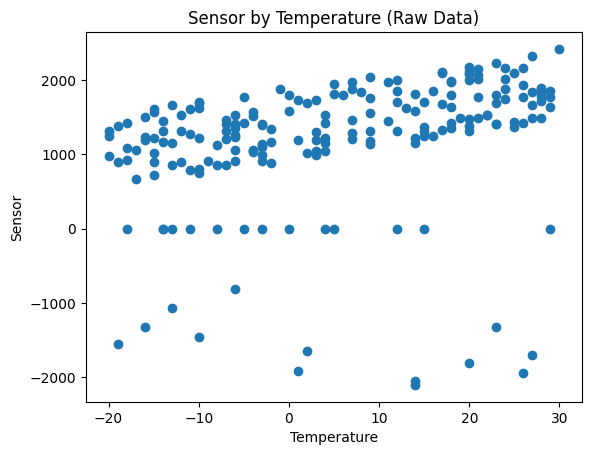

In [150]:
# Plot the sensor data using the temperature as the x-axis and the sensor value as the y-axis.
plt.scatter(temp_vals, sensor_vals)
# Label the x-axis as "Temperature" and the y-axis as "Sensor".
plt.xlabel("Temperature")
plt.ylabel("Sensor")
#  Make the title of your plot "Sensor by Temperature (Raw Data)".
plt.title("Sensor by Temperature (Raw Data)")

### <span style="color:red">Task 5</span>

* Plot the frequency of temperature values as a bar plot with an appropriate title, x-axis label and y-axis label.
* Plot the frequency of sensor values as a bar plot with an appropriate title, x-axis label and y-axis label.

You may find it useful to use your friend, The Internet, to look at the information about mapplotlib bar plots.

Text(0, 0.5, '# of Occurences')

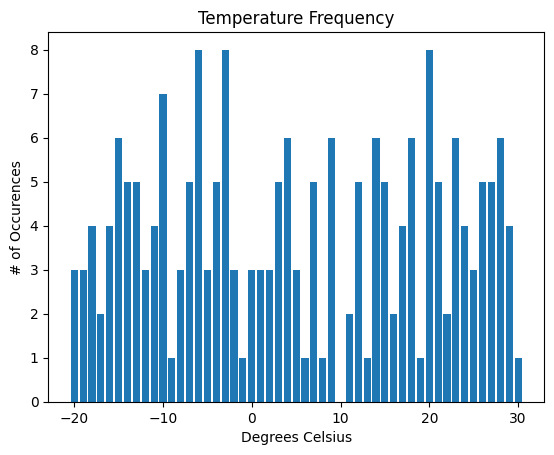

In [151]:
# Plot the frequency of temperature values as a bar plot with an appropriate title, x-axis label and y-axis label.
plt.bar(temp_frequencies.keys(), temp_frequencies.values())
plt.title("Temperature Frequency")
plt.xlabel("Degrees Celsius")
plt.ylabel("# of Occurences")

Text(0, 0.5, '# of Occurences')

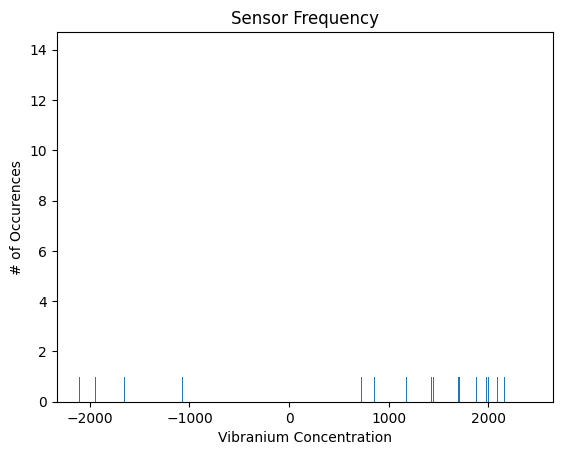

In [152]:
# Plot the frequency of sensor values as a bar plot with an appropriate title, x-axis label and y-axis label.
plt.bar(sensor_frequencies.keys(), sensor_frequencies.values())
plt.title("Sensor Frequency")
plt.xlabel("Vibranium Concentration")
plt.ylabel("# of Occurences")

## Preparing Data

You noticed some unexpected values in the sensor readings.  You sought out the sensor engineer for some clarification.  She tells you in no uncertain terms that the sensors are prototypes and you should expect errors.

She explains that the maximum valid sensor value is 2000 and the minimum valid value is 1000.  She also explains some other types of sensor errors (described below) and her recommendation on handling the problem.

Three types of sensor errors:
1.  Sometimes the sensor is too slow to capture a reading.  Missing values are represented as sensor values of 0.  Drop these readings.  There is no way to estimate the true value in this case.
2.  There is a sensor bug that sometimes reports the sensor value as a negative value rather than the true positive value.  Replace these values with the absolute value (positive value) of the reading.
3.  At extreme upper and lower ranges of valid sensor values, sensors may report values below minimum and above maximum.  Replace these values with the valid min or max, as appropriate.

### <span style="color:red">Task 6</span>

* Write a Python function to correct the sensor errors as guided by the sensor engineer's recommendations.  This function will take as input the temperature list and the sensor list and return two new lists (i.e., the "cleaned" temperature and sensor lists).  Don't destroy your copies of the "raw" lists and make sure you don't destry the integrity of your lists (remember that temperatures and sensor values are related)
* Test your function with some simple lists that you create by hand to test all of your edge cases.
* Produce "clean" lists by calling your "preparation" function on the original temperature and sensor data.
* Print the first 5 sensor values and the first 5 temperature values for the raw and clean data.  Verify by viewing that these values are correct.
* Print the count/length of the sensor list and the temperature list.

In [153]:
# Write a Python function to correct the sensor errors as guided by the sensor engineer's recommendations.  This function will take as input the temperature list and the sensor list and return two new lists (i.e., the "cleaned" temperature and sensor lists).  Don't destroy your copies of the "raw" lists and make sure you don't destry the integrity of your lists (remember that temperatures and sensor values are related)
def correct_sensor_errors(sensor_data: list, temp_data: list) -> tuple:
    """Corrects the 3 mentioned errors above and returns a copied tuple of the corrected sensor data and temperature data lists.

    Args:
        sensor_data (list of floats): Sensor readings
        temp_data (list of ints): Temperature readings

    Returns:
       tuple of lists: The corrected sensor data and temperature data lists.
    """
    sensor_fixed = []
    temp_fixed = []
    for sensorval, tempval in zip(sensor_data, temp_data):
        if sensorval == 0:
            continue
        elif sensorval < 0:
            sensorval = abs(sensorval)
        elif sensorval < 1000:
            sensorval = 1000
        elif sensorval > 2000:
            sensorval = 2000
        sensor_fixed.append(sensorval)
        temp_fixed.append(tempval)
    return sensor_fixed, temp_fixed

In [154]:
# Test your function with some simple lists that you create by hand to test all of your edge cases.
test_sensor_list = [1000, 1500, 2455, 300, 0, -12, 23, 657, 2365.4, 123.23]
test_temp_list = [1, 32, 0, 23, 45, 67, 89, 23, 4, 1]
print(f"Length of the sensor list: {len(test_sensor_list)}, Length of the temp list: {len(test_temp_list)}")
print(f"Sensor list: {test_sensor_list}, Temp list: {test_temp_list}")
corrected_sensors, corrected_temps = correct_sensor_errors(test_sensor_list, test_temp_list)
print(f"Corrected sensor list: {corrected_sensors}, Corrected temp list: {corrected_temps}")

Length of the sensor list: 10, Length of the temp list: 10
Sensor list: [1000, 1500, 2455, 300, 0, -12, 23, 657, 2365.4, 123.23], Temp list: [1, 32, 0, 23, 45, 67, 89, 23, 4, 1]
Corrected sensor list: [1000, 1500, 2000, 1000, 12, 1000, 1000, 2000, 1000], Corrected temp list: [1, 32, 0, 23, 67, 89, 23, 4, 1]


In [155]:
# Produce "clean" lists by calling your "preparation" function on the original temperature and sensor data.
clean_sensor, clean_temp = correct_sensor_errors(sensor_vals, temp_vals)
# Print the first 5 sensor values and the first 5 temperature values for the raw and clean data.  Verify by viewing that these values are correct.
print(sensor_vals[:5], clean_sensor[:5])
print(temp_vals[:5], clean_temp[:5])
# Print the count/length of the sensor list and the temperature list.
print(len(sensor_vals), len(clean_sensor))

[-1808.0, 1664.4, 1382.2, 2320.4, 1403.4] [1808.0, 1664.4, 1382.2, 2000, 1403.4]
[20, -13, -19, 27, -3] [20, -13, -19, 27, -3]
200 186


### <span style="color:red">Task 7</span>

* Run your "descriptive statistics" and "frequency" functions on your clean temperature and sensor lists and compare them to the "raw" results.

In [156]:
stats(sensor_vals)
stats(clean_sensor)
stats(temp_vals)
stats(clean_temp)

count_frequencies(sensor_vals)
count_frequencies(clean_sensor)
count_frequencies(temp_vals)
count_frequencies(clean_temp)

Count: 200
Min: -2103.8
Max: 2420.0
Mean: 1175.615
Sum: 235123.0000000001
Mode: 0.0
Median: 1380.6
S.D.: 900.6154085655701
Count: 186
Min: 808.8
Max: 2103.8
Mean: 1488.1602150537635
Sum: 276797.79999999993
Mode: 1000
Median: 1456.8
S.D.: 335.70083001605315
Count: 200
Min: -20
Max: 30
Mean: 5
Sum: 1000
Mode: 20
Median: 4.0
S.D.: 14.90404821739153
Count: 186
Min: -20
Max: 30
Mean: 5.489247311827957
Sum: 1021
Mode: 20
Median: 4.5
S.D.: 14.931280152685025


{20: 8,
 -13: 4,
 -19: 3,
 27: 5,
 -3: 7,
 -5: 2,
 -6: 8,
 -12: 3,
 -14: 3,
 23: 6,
 14: 6,
 -15: 6,
 17: 4,
 7: 5,
 -18: 3,
 -7: 5,
 18: 6,
 15: 4,
 -8: 2,
 25: 3,
 21: 5,
 24: 4,
 6: 1,
 8: 1,
 -20: 3,
 28: 6,
 -10: 7,
 1: 3,
 -11: 3,
 4: 5,
 2: 3,
 -4: 5,
 26: 5,
 9: 6,
 -2: 3,
 19: 1,
 3: 5,
 16: 2,
 -16: 4,
 22: 2,
 29: 3,
 0: 2,
 -17: 2,
 11: 2,
 5: 2,
 12: 4,
 30: 1,
 13: 1,
 -9: 1,
 -1: 1}

### <span style="color:red">Task 8</span>

* Create a scatter plot using your prepared data. (Optional: use function that you wrote)
* The titile for this plot should be "Sensor by Temperature (Prepared Data)".

Text(0.5, 1.0, 'Sensor by Temperature (Cleaned Data)')

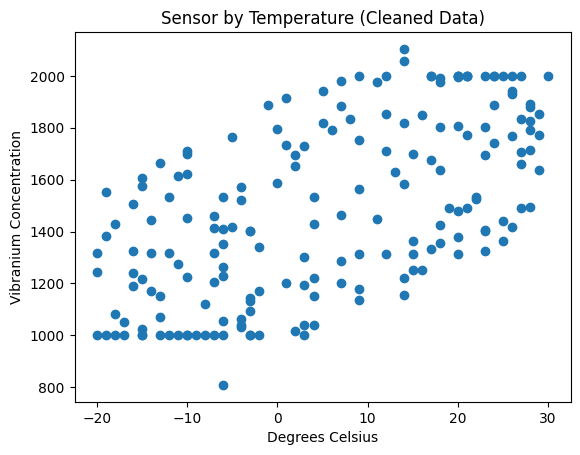

In [157]:
# Create a scatter plot using your prepared data. (Optional: use function that you wrote)
plt.scatter(clean_temp, clean_sensor)
plt.xlabel("Degrees Celsius")
plt.ylabel("Vibranium Concentration")
# The titile for this plot should be "Sensor by Temperature (Prepared Data)".
plt.title("Sensor by Temperature (Cleaned Data)")

## Model Building

After looking at the sensor plots, you decide a linear regression model may do a good job fitting the data.  Now, you need to build the model.

You may find it useful to refer to the "regression_example" notebook for hints in building this model.

### <span style="color:red">Task 9</span>

The scilearn-kit libraries require training data to be in a numpy "array of arrays".  See the referenced notebook above for hints on making that conversion.  

* Create a "training_X" numpy array of arrays from your "prepared" temperature list. (Hint: use np.c_)
* Create a "training_y" numpy array of arrays from your "prepared" sensor list. (Hint: use np.c_)

In [158]:
# Create a "training_X" numpy array of arrays from your "prepared" temperature list. (Hint: use np.c_)
training_x = np.c_[clean_temp]
# Create a "training_y" numpy array of arrays from your "prepared" sensor list. (Hint: use np.c_)
training_y = np.c_[clean_sensor]

### <span style="color:red">Task 10</span>
* Create a linear model object

See the referenced notebook above for hints.  

In [159]:
# Create a linear model object
linear_model = linear_model.LinearRegression()

AttributeError: 'LinearRegression' object has no attribute 'LinearRegression'

### <span style="color:red">Task 11</span>
* Train the linear model using your training temperature and sensor data.

See the referenced notebook above for hints.  

In [ ]:
# Train the linear model using your training temperature and sensor data.
linear_model.fit(training_x, training_y)

### <span style="color:red">Task 12</span>
* Print the equation for the resulting prediction line.

See the referenced notebook above for hints.  

In [ ]:
print(f"Vibranium concentration prediction line equation: y = {linear_model.coef_[0][0]}x + {linear_model.intercept_[0]}")

### <span style="color:red">Task 13</span>
* Print a scatter plot of the prepared data with the predicted line superimposed on the data.

See the referenced notebook above for hints.  

In [ ]:
# Print a scatter plot of the prepared data with the predicted line superimposed on the data.
res = sns.regplot(x=clean_temp, y=clean_sensor, label="Predicted Line")
res.set(xlabel="Degrees Celsius", ylabel="Vibranium Concentration", title="Sensor by Temperature (Cleaned Data)")

## Model Usage

Feeling exceptionally brave, you decide to demonstrate the predictions of your model to the sensor engineer.

### <span style="color:red">Task 14</span>
* Demonstrate your predictor with a single input Celsius value of 5.
* Demonstrate your predictor for the a list of input temperatures: -25, 5, 7, 12, 25

Note that the input to the "predict" method requires a list of lists as input.  Also, the results are returned as list of lists.

See the referenced notebook above for hints.  

In [ ]:
# Demonstrate your predictor with a single input Celsius value of 5.
print(f"Estimated Vibranium concentration at 5 degrees Celsius: {linear_model.predict([[5]])[0][0]}")
# Demonstrate your predictor for the a list of input temperatures: -25, 5, 7, 12, 25
vals = [-25,5,7,12,25]
print(f"Predicted results for {vals}: {linear_model.predict(np.c_[vals])}")

## Results

You need to report your results to the sensor engineer.  Most of your results are captured in the results above, but there is potentially more to do.


### <span style="color:red">Task 15</span>

* What do you suggest that you and the sensor engineer do to assess the quality of the predictions, perhaps including further actions to take?

Here I cheat a little bit on the project by referring to my previous experience in Dr. Stine's Machine Learning class! There's a number of metrics we can use when evaluating non-categorical linear prediction models to judge the efficacy of our outputs:
* MSE: Mean Squared Error
    * We can use the `mean_squared_error` method from the LinearRegression class to get the MSE, giving it the test data and the predicted data as inputs. ex. mean_squared_error(test_data, predicted_data)
* R^2: Coefficient of Determination
    * We can similarly use the `score` method from the LinearRegression class to get the R^2, again giving it the test data and the predicted data as inputs. ex. score(test_data, predicted_data)

Implmenting both of these methods would be fantastic ways to evalute the quality of our models and help determine if our dataset and model can sufficiently provide an accurate representation and prediction of the sensor data.

<p style="font-size:120%;color:navy;background:linen;padding:10px;text-align:center">&copy; Copyright 2022 by Michelle Talley <br> <br>You may not publish this notebook on any website or share it with anyone without explicit permission of the author. </p>
